In [1]:
# pip install pycaret

## AirBnB Optimization

#### Airbnb
    Airbnb Inc, is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app. Airbnb does not own any of the listed properties; instead, it profits by receiving commission from each booking. The company was founded in 2008. Airbnb is a shortened version of its original name, AirBedandBreakfast.com.

#### Content

    The following Airbnb activity is included in this New York dataset:
    Listings, including full descriptions and average review score Reviews, including unique id for each reviewer and detailed comments Calendar, including listing id and the price and availability for that day

#### Goal

    Predict Airbnb listing prices using features like location, room type, reviews, etc.



#### Import and Ananlyze Dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
#import dataset
data = pd.read_csv('Airbnb_Open_Data.csv')

C:\Users\USER\AppData\Local\Temp\ipykernel_13260\139868976.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Airbnb_Open_Data.csv')


In [4]:
#observe data
data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [5]:
#check data size
data.shape

(102599, 26)

#### Data cleaning

In [6]:
data.isna().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

##### Drop licence as it has no values 

In [7]:
data = data.drop('license', axis = 1)

In [8]:
data.columns     #.isna().sum()

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules'],
      dtype='object')

##### Features and their description


| Feature                          | Description                                              |
|----------------------------------|----------------------------------------------------------|
| `id`                             | Unique listing ID                                        |
| `NAME`                           | Title of the listing                                     |
| `host id`                        | Unique ID for the host                                   |
| `host_identity_verified`        | Whether host is verified                                 |
| `host name`                      | Name of the host                                         |
| `neighbourhood group`           | High-level area (e.g., city borough)                     |
| `neighbourhood`                 | Specific neighborhood                                    |
| `lat`                            | Latitude                                                 |
| `long`                           | Longitude                                                |
| `country`                        | Country name                                             |
| `country code`                  | ISO country code                                         |
| `instant_bookable`              | Can book instantly without approval                      |
| `cancellation_policy`           | Level of cancellation flexibility                        |
| `room type`                     | Entire home, private/shared room                         |
| `Construction year`            | Year building was constructed                            |
| `price`                          | Target variable (nightly price)                          |
| `service fee`                   | Additional fee charged                                   |
| `minimum nights`               | Minimum stay length                                      |
| `number of reviews`            | Total number of reviews                                  |
| `last review`                  | Date of last review                                      |
| `reviews per month`            | Average monthly review count                             |
| `review rate number`           | Average rating score                                     |
| `calculated host listings count`| Total listings the host has                              |
| `availability 365`             | Available days per year                                  |
| `house_rules`                  | Host's custom rules                                      |
timent                  |


##### Drop not-useful columns and redunctant ones

    Based on the description above, we will drop the following features as they have no relevance to our analysis and ultimately to our model;
    
    Id, name, host id, host name, country code(this correlates perfectly with the feature 'country')

In [9]:
data.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules'],
      dtype='object')

In [10]:
data = data.drop(['id', 'NAME', 'host id', 'host name',
       'country code',], axis = 1)

#### Feature Engineering

##### Handle categorical features (encoding)

In [11]:
data1 = data.copy()

In [12]:
data1['host_identity_verified'].unique()

array(['unconfirmed', 'verified', nan], dtype=object)

In [13]:
data1['host_identity_verified'] = data1['host_identity_verified'].map({'unconfirmed' : 0, 'verified' : 1})

In [14]:
data1['neighbourhood group'].unique()

array(['Brooklyn', 'Manhattan', 'brookln', 'manhatan', 'Queens', nan,
       'Staten Island', 'Bronx'], dtype=object)

In [15]:
data1['neighbourhood group'] = data1['neighbourhood group'].map({'Brooklyn' : 0, 'Manhattan' : 1, 'brookln' : 2, 'manhatan' : 3, 'Queens' : 4,
       'Staten Island' : 5, 'Bronx' : 6})

In [16]:
data1['neighbourhood'].nunique()

224

In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data1['neighbourhood'] = label_encoder.fit_transform(data1['neighbourhood'])  # Converts to integers 0 to 219


In [18]:
data1['country'].unique()

array(['United States', nan], dtype=object)

In [19]:
data1['country'] = data1['country'].map({'United States' : 1})  

In [20]:
data1['instant_bookable'].unique()

array([False, True, nan], dtype=object)

In [21]:
# data1['instant_bookable']  = data1['instant_bookable'].map({False, True,})

In [22]:
data1['cancellation_policy'].unique()

array(['strict', 'moderate', 'flexible', nan], dtype=object)

In [23]:
data1['cancellation_policy'] = data1['cancellation_policy'].map({'strict' : 0, 'moderate' : 1, 'flexible' : 2})

In [24]:
data1['room type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [25]:
data1['room type'] =  data1['room type'].map({'Private room' : 0 , 'Entire home/apt' : 1, 'Shared room' : 2, 'Hotel room' : 3})

In [26]:
data1['house_rules'].nunique()

1976

In [27]:
#Using label encoder since there are 1976 instances
label_encoder 
data1['house_rules'] = label_encoder.fit_transform(data1['house_rules'])  # Converts to integers 


In [28]:
data1.head(2)

,host_identity_verified,neighbourhood group,neighbourhood,lat,long,country,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
0,0.0,0.0,111,40.64749,-73.97237,1.0,False,0.0,0,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,444
1,1.0,1.0,130,40.75362,-73.98377,1.0,False,1.0,1,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,1218


##### Handle Continuous Features

In [29]:
#remove the dollar symbol from price feature
data1['price'] = data1['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

In [30]:
#check if changes applied
data1.head(1)

,host_identity_verified,neighbourhood group,neighbourhood,lat,long,country,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
0,0.0,0.0,111,40.64749,-73.97237,1.0,False,0.0,0,2020.0,966.0,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,444


In [31]:
data1['service fee'] = data1['service fee'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

In [32]:
data1.head(1)

,host_identity_verified,neighbourhood group,neighbourhood,lat,long,country,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
0,0.0,0.0,111,40.64749,-73.97237,1.0,False,0.0,0,2020.0,966.0,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,444


##### Handle date-time data

In [33]:
#Check data type of date feature
data1['last review'].dtype

dtype('O')

In [34]:
#convert datatime object to pandas.data_time
data1['last review'] = pd.to_datetime(data['last review'])

In [35]:
data1['last review'].dtype

dtype('<M8[ns]')

In [36]:
#extract date_time info from feature
data1['month'] = data1['last review'].dt.month
data1['year'] = data1['last review'].dt.year
data1['day'] = data1['last review'].dt.day

In [37]:
print(f"number of unique instances for \nMonth: {data1['month'].nunique()} \nYear: {data1['year'].nunique()} \nDay: {data1['day'].nunique()}")

number of unique instances for 
Month: 12 
Year: 16 
Day: 31


In [38]:
#haven extracted the values from date, we drop it
data1 = data1.drop('last review', axis = 1)

In [39]:
data1.head(3)

,host_identity_verified,neighbourhood group,neighbourhood,lat,long,country,instant_bookable,cancellation_policy,room type,Construction year,...,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,month,year,day
0,0.0,0.0,111,40.64749,-73.97237,1.0,False,0.0,0,2020.0,...,10.0,9.0,0.21,4.0,6.0,286.0,444,10.0,2021.0,19.0
1,1.0,1.0,130,40.75362,-73.98377,1.0,False,1.0,1,2007.0,...,30.0,45.0,0.38,4.0,2.0,228.0,1218,5.0,2022.0,21.0
2,NaN,1.0,97,40.80902,-73.94190,1.0,True,2.0,0,2005.0,...,3.0,0.0,NaN,5.0,1.0,352.0,583,NaN,NaN,NaN


#### Handle Null Values

In [40]:
data1.isna().sum()

host_identity_verified              289
neighbourhood group                  29
neighbourhood                         0
lat                                   8
long                                  8
country                             532
instant_bookable                    105
cancellation_policy                  76
room type                             0
Construction year                   214
price                               247
service fee                         273
minimum nights                      409
number of reviews                   183
reviews per month                 15879
review rate number                  326
calculated host listings count      319
availability 365                    448
house_rules                           0
month                             15893
year                              15893
day                               15893
dtype: int64

In [41]:
#total number of instances 
len(data1)

102599

In [42]:
#number of instances if most null values are removed
102599 - 15893

86706

In [43]:
data2 = data1.copy()
data3 = data2.copy()

##### Drop null values 

In [44]:
data2.dropna(inplace =True)

In [45]:
data2.shape

(84388, 22)

In [46]:
data2.head(2)

,host_identity_verified,neighbourhood group,neighbourhood,lat,long,country,instant_bookable,cancellation_policy,room type,Construction year,...,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,month,year,day
0,0.0,0.0,111,40.64749,-73.97237,1.0,False,0.0,0,2020.0,...,10.0,9.0,0.21,4.0,6.0,286.0,444,10.0,2021.0,19.0
1,1.0,1.0,130,40.75362,-73.98377,1.0,False,1.0,1,2007.0,...,30.0,45.0,0.38,4.0,2.0,228.0,1218,5.0,2022.0,21.0


In [49]:
# data3_imputed  = 

#### Standardize data (continuous features)

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
x = data2.drop('price', axis = 1)
y = data2['price']

In [52]:
pd.options.display.max_columns = 30
x.head(1)

,host_identity_verified,neighbourhood group,neighbourhood,lat,long,country,instant_bookable,cancellation_policy,room type,Construction year,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,month,year,day
0,0.0,0.0,111,40.64749,-73.97237,1.0,False,0.0,0,2020.0,193.0,10.0,9.0,0.21,4.0,6.0,286.0,444,10.0,2021.0,19.0


In [53]:
#extract continuous data for standardization
x_norm = x[['neighbourhood', 'lat', 'long', 'service fee', 'availability 365']]

In [54]:
#extract categorical data
x_cat = x[['host_identity_verified', 'neighbourhood group',
        'country', 'instant_bookable', 'cancellation_policy',
       'room type', 'Construction year', 'minimum nights',
       'number of reviews', 'reviews per month', 'review rate number',
       'calculated host listings count', 'house_rules',
       'month', 'year', 'day']]

In [55]:
#scale the extracted continuous data
scaler = StandardScaler()
x_trans = scaler.fit_transform(x_norm)

In [56]:
#convert the scaled data into dataframe
x_norm_trans = pd.DataFrame(
    data = x_trans,
    columns = x_norm.columns,
)

In [57]:
#overview new dataframe
x_norm_trans.head(3)

,neighbourhood,lat,long,service fee,availability 365
0,0.049200,-1.418153,-0.474059,1.021183,1.076864
1,0.321906,0.465928,-0.700302,-1.464859,0.643857
2,-0.941150,-0.749768,-0.223802,-0.771781,1.345626


In [58]:
x_cat.head(2)

,host_identity_verified,neighbourhood group,country,instant_bookable,cancellation_policy,room type,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,house_rules,month,year,day
0,0.0,0.0,1.0,False,0.0,0,2020.0,10.0,9.0,0.21,4.0,6.0,444,10.0,2021.0,19.0
1,1.0,1.0,1.0,False,1.0,1,2007.0,30.0,45.0,0.38,4.0,2.0,1218,5.0,2022.0,21.0


In [59]:
#reset index of dataframes
x_norm_trans=x_norm_trans.reset_index(drop=True)
x_cat=x_cat.reset_index(drop=True)

In [60]:
x_cat.shape,x_norm_trans.shape

((84388, 16), (84388, 5))

In [61]:
#join dataframes
x_complete = x_cat.join(x_norm_trans) # on = index)  #.reset_index()


In [62]:
x_complete.head()

,host_identity_verified,neighbourhood group,country,instant_bookable,cancellation_policy,room type,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,house_rules,month,year,day,neighbourhood,lat,long,service fee,availability 365
0,0.0,0.0,1.0,False,0.0,0,2020.0,10.0,9.0,0.21,4.0,6.0,444,10.0,2021.0,19.0,0.049200,-1.418153,-0.474059,1.021183,1.076864
1,1.0,1.0,1.0,False,1.0,1,2007.0,30.0,45.0,0.38,4.0,2.0,1218,5.0,2022.0,21.0,0.321906,0.465928,-0.700302,-1.464859,0.643857
2,0.0,0.0,1.0,True,1.0,1,2005.0,30.0,270.0,4.64,4.0,1.0,1976,7.0,2019.0,5.0,-0.941150,-0.749768,-0.223802,-0.771781,1.345626
3,1.0,1.0,1.0,False,1.0,1,2009.0,10.0,9.0,0.10,3.0,1.0,1368,11.0,2018.0,19.0,-0.654092,1.262841,0.089168,-1.268989,1.099261
4,1.0,1.0,1.0,True,2.0,1,2013.0,3.0,74.0,0.59,3.0,1.0,1126,6.0,2019.0,22.0,0.465435,0.360300,-0.526253,-0.154037,1.733839


In [63]:
x_complete['instant_bookable'] = x_complete['instant_bookable'].map({False : 0, True : 1}).astype('int')

#### Perform EDA to uncover data distribution

In [64]:
x.describe()

,host_identity_verified,neighbourhood group,neighbourhood,lat,long,country,cancellation_policy,room type,Construction year,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,month,year,day
count,84388.000000,84388.000000,84388.000000,84388.000000,84388.000000,84388.0,84388.000000,84388.000000,84388.000000,84388.000000,84388.000000,84388.000000,84388.000000,84388.000000,84388.000000,84388.000000,84388.000000,84388.000000,84388.000000,84388.000000
mean,0.500130,1.160141,107.572096,40.727374,-73.948483,1.0,0.998874,0.572273,2012.488304,125.223527,7.418910,32.206901,1.375157,3.279625,7.028724,141.757134,1499.567000,5.893930,2018.990579,15.831777
std,0.500003,1.557809,69.672706,0.056330,0.050389,0.0,0.815414,0.540340,5.761341,66.370959,27.977147,51.844699,1.748143,1.282816,29.462376,133.947985,637.346457,3.018191,1.661437,9.815364
min,0.000000,0.000000,0.000000,40.504560,-74.249840,1.0,0.000000,0.000000,2003.000000,10.000000,-365.000000,1.000000,0.010000,1.000000,1.000000,-10.000000,0.000000,1.000000,2012.000000,1.000000
25%,0.000000,0.000000,52.000000,40.687670,-73.982110,1.0,0.000000,0.000000,2007.000000,68.000000,2.000000,3.000000,0.220000,2.000000,1.000000,6.000000,1030.000000,4.000000,2018.000000,6.000000
50%,1.000000,1.000000,97.000000,40.721330,-73.953700,1.0,1.000000,1.000000,2012.000000,125.000000,3.000000,11.000000,0.740000,3.000000,1.000000,100.000000,1976.000000,6.000000,2019.000000,17.000000
75%,1.000000,1.000000,174.000000,40.762620,-73.930830,1.0,2.000000,1.000000,2017.000000,183.000000,5.000000,38.000000,2.010000,4.000000,2.000000,266.000000,1976.000000,7.000000,2019.000000,24.000000
max,1.000000,6.000000,224.000000,40.916970,-73.705220,1.0,2.000000,3.000000,2022.000000,240.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000,1976.000000,12.000000,2026.000000,31.000000


In [65]:
#import necessary libraries 
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\USER\AppData\Local\Temp\ipykernel_13260\4003535821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x['neighbourhood'])
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


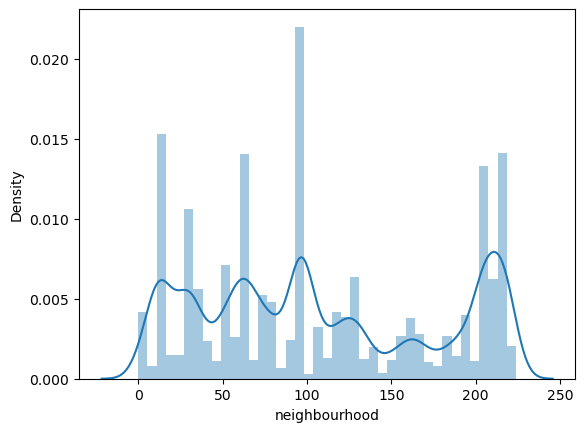

In [66]:
sns.distplot(x['neighbourhood'])
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_13260\2884024394.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_trans[9:10])
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


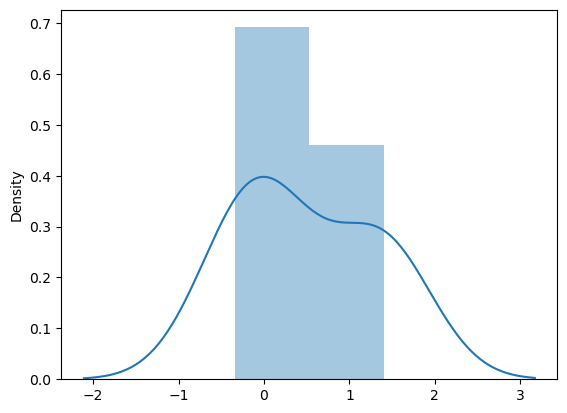

In [67]:
sns.distplot(x_trans[9:10])
plt.show()

#### Build model 

In [68]:
#import model
from sklearn.linear_model import LinearRegression

In [69]:
model = LinearRegression(n_jobs = 10)

##### Split model into train and test

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x_complete, y, train_size = 0.8, random_state = 69)

In [72]:
model.fit(x_train, y_train)

LinearRegression(n_jobs=10)

#### Model Evaluation

In [80]:
print(f"Model performance on train data : {model.score(x_train, y_train)} \nModel performance on unseen data : {model.score(x_test, y_test)}")

Model performance on train data : 0.999981816596682 
Model performance on unseen data : 0.9999818462930642


##### Make predictions

In [81]:
y_pred = model.predict(x_test[:5])

##### Compare predicted values to actual values

In [82]:
print(f"Predicted values{y_pred.round()} \nActual values{tuple(y_test[:5].round())}")

Predicted values[ 180.  970.  930. 1010.  825.] 
Actual values(182.0, 971.0, 928.0, 1008.0, 827.0)
